In [1]:
### Preface ###
# We will use KNN to classify income whether <=50K or >50K by these numerical attribues "age, education-num, capital-gain, capital-loss, hours-per-week".
# I didn't include transformed nominal attributes (Eg. sex).

### references materials ###
# algorithm, https://medium.com/analytics-vidhya/easy-knn-algorithm-using-scikit-learn-7f6e256c9453
# n of KNN, https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75
# multiple attributes, https://medium.com/@avulurivenkatasaireddy/k-nearest-neighbors-and-implementation-on-iris-data-set-f5817dd33711

In [2]:
# import library, loading dataset

import numpy as np
import pandas as pd
data = pd.read_csv("https://raw.githubusercontent.com/superbijk/assignment-knn/master/census.csv")
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
# drop non-numerical (categorical) columns

drop_columns = ['workclass', 'education_level','marital-status','occupation','relationship','race','sex','native-country']
data = data.drop(columns= drop_columns, axis = 1)
data.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
0,39,13.0,2174.0,0.0,40.0,<=50K
1,50,13.0,0.0,0.0,13.0,<=50K
2,38,9.0,0.0,0.0,40.0,<=50K
3,53,7.0,0.0,0.0,40.0,<=50K
4,28,13.0,0.0,0.0,40.0,<=50K


In [4]:
# data preparation
data_prep = data

# normalized numerical into 0-1 with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical = ['education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data_prep[numerical] = scaler.fit_transform(data[numerical])

# discretized (bining) age into 4 grouped where '0-15' = 0, '16-30' = 1, '31-45' = 2, '46-60' = 3, '60+' = 4
data_prep = data_prep.rename(columns={'age' : 'age-group'} )
data_prep['age-group'] = pd.cut(data_prep['age-group'], bins=[0, 15, 30, 45, 60, 200],  labels=[0, 1, 2, 3, 4])
data_prep.head()

,age-group,education-num,capital-gain,capital-loss,hours-per-week,income
0,2,0.800000,0.02174,0.0,0.397959,<=50K
1,3,0.800000,0.00000,0.0,0.122449,<=50K
2,2,0.533333,0.00000,0.0,0.397959,<=50K
3,3,0.400000,0.00000,0.0,0.397959,<=50K
4,1,0.800000,0.00000,0.0,0.397959,<=50K


In [5]:
# import KNN library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# select parameter (x) and target (y)
x=data_prep.iloc[:,:-1] #all parameters
y=data_prep['income'] #target



In [6]:
# set up k of KNN and n of cross validation
scores = {} # dictionary, key is n of KNN and value is list of score
k_range = range(1,11)
cross_count = range(1,6)

# loop though each k
for k in k_range:
    score_list = [] # value of each k
    print('k',k)
    # set up k KNN
    knn = KNeighborsClassifier(n_neighbors = k)
    # loop though each cross
    for cross in cross_count:
        print('cross',cross)
        # begin split 80/20
        x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
        # KNN fit
        knn.fit(x_train,y_train)
        y_pred = knn.predict(x_test)
        score_list.append(metrics.accuracy_score(y_test, y_pred))
    print(score_list)  
    scores[k] = score_list

k 1
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7701492537313432, 0.7927031509121062, 0.7386401326699834, 0.7657269209508015, 0.7635157545605307]
k 2
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7954671088999448, 0.8080707573244886, 0.8045328911000553, 0.8112769485903815, 0.8044223327805418]
k 3
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7981205085682698, 0.7973466003316749, 0.7883913764510779, 0.7939192924267551, 0.8036484245439469]
k 4
cross 1
cross 2
cross 3
cross 4
cross 5
[0.808955223880597, 0.8122719734660033, 0.8100608070757325, 0.8109452736318408, 0.8122719734660033]
k 5
cross 1
cross 2
cross 3
cross 4
cross 5
[0.7994472084024323, 0.8059701492537313, 0.8096185737976783, 0.8114980652294085, 0.8051962410171365]
k 6
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8124930901050305, 0.8134881149806523, 0.8045328911000553, 0.8126036484245439, 0.8053067993366501]
k 7
cross 1
cross 2
cross 3
cross 4
cross 5
[0.8017689331122166, 0.8099502487562189, 0.8139303482587065, 0.8153676064123825, 0.8090

In [7]:
# preview accuracy score for each K
scoredf = pd.DataFrame(data=scores)
scoredf.columns = ['K' + str(x) for i, x in enumerate(scoredf)]
scoredf

,K1,K2,K3,K4,K5,K6,K7,K8,K9,K10
0,0.770149,0.795467,0.798121,0.808955,0.799447,0.812493,0.801769,0.805749,0.816363,0.817247
1,0.792703,0.808071,0.797347,0.812272,0.805970,0.813488,0.809950,0.807850,0.811830,0.805970
2,0.738640,0.804533,0.788391,0.810061,0.809619,0.804533,0.813930,0.816363,0.817468,0.811498
3,0.765727,0.811277,0.793919,0.810945,0.811498,0.812604,0.815368,0.810724,0.811388,0.798784
4,0.763516,0.804422,0.803648,0.812272,0.805196,0.805307,0.809066,0.808513,0.818021,0.819237


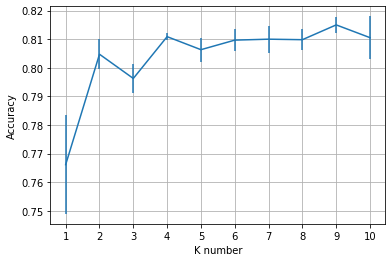

In [8]:
# import matplotlib library
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# calculate SD for error bar (I use 1±SD)
x = k_range
y = [np.mean(scores[k]) for k in k_range]
error = [np.std(scores[k]) for k in k_range]

# plot
fig, ax = plt.subplots()
ax.errorbar(x, y, yerr=error)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.grid(True)
plt.xlabel('K number')
plt.ylabel('Accuracy')
plt.show()

In [9]:
# select the best k number
best_K = y.index(max(y))
print('The best K number from 1 to 10 is:', best_K+1)
print('Accuracy of K =', best_K+1, 'is', y[best_K])

The best K number from 1 to 10 is: 9
Accuracy of K = 9 is 0.8150138197899391


In [10]:
# confusion matrix
# https://en.wikipedia.org/wiki/Confusion_matrix
# 4 cells of true positive (TP), true negative (TN), false positive (FP), false negative (FN)


![title](https://raw.githubusercontent.com/superbijk/assignment-knn/master/confusion_lecture.png)

In [11]:
# select parameter (x) and target (y)
x=data_prep.iloc[:,:-1] #all parameters
y=data_prep['income'] #target

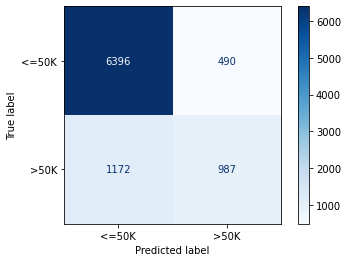

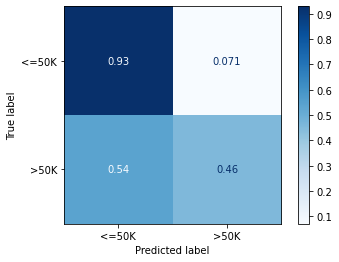

In [12]:
# confusion matrix for k = 5
knn = KNeighborsClassifier(n_neighbors = 5)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)

# count and plot with sklearn
from sklearn.metrics import plot_confusion_matrix

titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, x_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)


In [13]:
# conventional confusion matrix
# confusion matrix for k = 5
matrix = pd.DataFrame()
matrix['true-income'] = y_test
matrix['predict-income'] = y_pred
matrix.head()

,true-income,predict-income
45051,<=50K,<=50K
9017,<=50K,<=50K
21779,>50K,<=50K
40889,>50K,<=50K
38316,<=50K,<=50K


In [14]:
matrix.count()

true-income       9045
predict-income    9045
dtype: int64

In [15]:
# predict >50K
TP = len(matrix[(matrix['true-income'] == '>50K') & (matrix['predict-income'] == '>50K')])
FN = len(matrix[(matrix['true-income'] == '>50K') & (matrix['predict-income'] == '<=50K')])
FP = len(matrix[(matrix['true-income'] == '<=50K') & (matrix['predict-income'] == '>50K')])
TN = len(matrix[(matrix['true-income'] == '<=50K') & (matrix['predict-income'] == '<=50K')])

print('True positive, >50K and we predict >50K is ', TP)
print('False negative, >50K but we predict <=50K is ', FN)
print('False positive, <=50K but we predict >50K is ', FP)
print('True negative, <=50K and we predict >50K is ', TN)

True positive, &gt;50K and we predict &gt;50K is  987
False negative, &gt;50K but we predict &lt;=50K is  1172
False positive, &lt;=50K but we predict &gt;50K is  490
True negative, &lt;=50K and we predict &gt;50K is  6396


In [ ]:
![title](https://raw.githubusercontent.com/superbijk/assignment-knn/master/confusion_result.png)